In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node


In [37]:
structure = 'VCA'

In [38]:
dataset_settings

,classes,network_model,stain,margins_um,num_sample_per_class,stacks,cell_features_used,comment
dataset_id,,,,,,,,
20,NaN,Inception-BN,nissl,200/500,1000,MD585,NaN,NaN
21,NaN,Inception-BN,nissl,200/500,1000,MD589,NaN,NaN
22,NaN,Inception-BN,nissl,200/500,1000,MD594,NaN,NaN
23,pos/surPos/surNoclass/neg,inception-bn-blue,nissl,500,1000,MD585,NaN,NaN
24,pos/surPos/surNoclass/neg,inception-bn-blue,nissl,500,1000,MD589,NaN,NaN
25,pos/surPos/surNoclass/neg,inception-bn-blue,nissl,500,1000,MD594,NaN,NaN
26,NaN,inception-bn-blue,nissl,NaN,1000,MD594/MD589/MD585,NaN,far negatives for Pn
27,NaN,inception-bn-blue,nissl,NaN,1000,MD585,NaN,far negatives for all structures
28,NaN,inception-bn-blue,nissl,NaN,1000,MD589,NaN,far negatives for all structures


In [39]:
classifier_settings = read_csv(CLASSIFIER_SETTINGS_CSV, header=0, index_col=0)
classifier_settings

,model,margin_um,train_set_id,neg_composition,sample_weighting,input_img_version,svm_id
classifier_id,,,,,,,
30,lr,500,20/21,neg_has_all_surround,NaN,cropped_gray,30.0
31,lr,500,21/22,neg_has_all_surround,NaN,cropped_gray,31.0
32,lr,500,20/22,neg_has_all_surround,NaN,cropped_gray,32.0
33,gb1,500,20/21,neg_has_all_surround,NaN,cropped_gray,33.0
34,gb1,500,21/22,neg_has_all_surround,NaN,cropped_gray,34.0
35,gb1,500,20/22,neg_has_all_surround,NaN,cropped_gray,35.0
36,gb1,500,23/24,neg_has_all_surround,NaN,cropped_gray,36.0
37,lr,500,23/24,neg_has_all_surround,NaN,cropped_gray,37.0
38,lr,500,23/24/27/28,neg_has_surround_and_negative,NaN,cropped_gray,38.0


In [76]:
classifier_id = 38
classifier_properties = classifier_settings.loc[classifier_id]

margin_um = classifier_properties['margin_um']
feature_classifier_model = classifier_properties['model']
sample_weighting = classifier_properties['sample_weighting']
neg_composition = classifier_properties['neg_composition']
svm_id = int(classifier_properties['svm_id'])

In [77]:
# Determine which labels to load.

structures_to_sample = [structure]
# structures_to_sample = all_known_structures
# structures_to_sample = ['Pn']

negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

margins_to_sample = [margin_um]
surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                             for m in margins_to_sample
                             for s in structures_to_sample 
                             for surr_l in all_known_structures
                             if surr_l != s]
surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                             for m in margins_to_sample
                             for s in structures_to_sample]

if neg_composition == 'neg_has_everything_else':
    labels_to_sample = structures_to_sample + negative_labels_to_sample
elif neg_composition == 'neg_has_only_surround_noclass':
    labels_to_sample = structures_to_sample + surround_noclass_labels_to_sample + ['noclass']
elif neg_composition == 'neg_has_all_surround':
    labels_to_sample = structures_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample + ['noclass']
elif neg_composition == 'neg_has_surround_and_negative':
    labels_to_sample = structures_to_sample + negative_labels_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample

In [78]:
# Load training dataset.

training_set_ids = map(int, str(classifier_properties['train_set_id']).split('/'))
training_features, training_addresses = load_datasets(training_set_ids, labels_to_sample=labels_to_sample)

In [79]:
labels_found = training_features.keys()
structures_found = set([convert_to_original_name(l) for l in labels_found 
                        if convert_to_original_name(l) in labels_found]) - {'noclass'}

In [80]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

xgboost is not loaded.

In [81]:
print structure

#############################
## Define Positive Samples ##
#############################

features_pos = training_features[structure]
n_pos = len(features_pos)
print n_pos, 'positive examples'

#############################
## Define Negative Samples ##
#############################

if neg_composition == 'neg_has_only_surround_noclass':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
elif neg_composition == 'neg_has_all_surround':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    for surr_s in all_known_structures:
        c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
        if c in labels_found:
            neg_classes.append(c)
elif neg_composition == 'neg_has_everything_else':
    neg_classes = [structure + '_negative']
elif neg_composition == 'neg_has_surround_and_negative':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    for surr_s in all_known_structures:
        c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
        if c in labels_found:
            neg_classes.append(c)
    neg_classes += [structure + '_negative']
else:
    raise Exception('neg_composition %s is not recognized.' % neg_composition)

features_neg = np.concatenate([training_features[neg_class] for neg_class in neg_classes])

n_neg = len(features_neg)
print n_neg, 'negative examples'

###########################
## Define Sample Weights ##
###########################

if sample_weighting == 'weighted':
    neg_distances = np.concatenate([distances_to_structures[neg_class][structure] for neg_class in neg_classes])

    sample_weights_neg = np.ones((n_neg,))
    sample_weights_neg[neg_distances > thresh] = diminishing(neg_distances[neg_distances > thresh])
    sample_weights = np.r_[np.ones((n_pos,)), sample_weights_neg]
else:
    sample_weights = None

###########################################################################################

train_data = np.r_[features_pos, features_neg]
train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                     -np.ones((features_neg.shape[0], ))]

#     n_train = len(train_labels0)
#     ri = np.random.choice(range(n_train), size=100, replace=False)
#     train_data = train_data0[ri]
#     train_labels = train_labels0[ri]

#####################################
## Define feature_classifier_model ##
#####################################

if feature_classifier_model == 'lr':
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                             fit_intercept=True, intercept_scaling=1, class_weight=None, 
                             random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=1)

elif feature_classifier_model == 'lin_svc':
    clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
              probability=True, tol=0.001, cache_size=1000, max_iter=-1,
          decision_function_shape=None, random_state=None)


elif feature_classifier_model == 'lin_svc_calib':

    sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                            C=1.0, multi_class='ovr', 
                            fit_intercept=True, intercept_scaling=1, max_iter=100)
    clf = CalibratedClassifierCV(sv_uncalibrated)


elif feature_classifier_model == 'xgb1':
    clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                        silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                        min_child_weight=20, max_delta_step=0, subsample=.8, 
                        colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, base_score=0.5, seed=0, missing=None)

elif feature_classifier_model == 'gb1':
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                     subsample=1., criterion='friedman_mse', 
                                     min_samples_split=50, min_samples_leaf=20, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, 
                                     min_impurity_split=1e-07, init=None, random_state=None, 
                                     max_features=None, verbose=1, max_leaf_nodes=None, 
                                     warm_start=False, presort='auto')

elif feature_classifier_model == 'gb2':
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                     subsample=1., criterion='friedman_mse', 
                                     min_samples_split=50, min_samples_leaf=20, 
                                     min_weight_fraction_leaf=0.0, max_depth=5, 
                                     min_impurity_split=1e-07, init=None, random_state=None, 
                                     max_features=None, verbose=1, max_leaf_nodes=None, 
                                     warm_start=False, presort='auto')


else:
    sys.stderr.write('Setting is not recognized.\n')

t = time.time()    
clf.fit(train_data, train_labels, sample_weight=sample_weights)
sys.stderr.write('Fitting classifier: %.2f seconds\n' % (time.time() - t))

# clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
# create_parent_dir_if_not_exists(clf_fp)
# joblib.dump(clf, clf_fp)

# upload_to_s3(clf_fp)

VCA
2000 positive examples
10000 negative examples


Fitting classifier: 4.20 seconds


In [3]:
####################

model_name = 'inception-bn-blue'
classifier_id = 38

classifier_properties = classifier_settings.loc[classifier_id]
assert dataset_settings.loc[int(classifier_properties['train_set_id'].split('/')[0])]['network_model'] == model_name
svm_id = int(classifier_properties['svm_id'])

########################

available_classifiers = {svm_id: DataManager.load_classifiers(classifier_id=svm_id)}

rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump"


Setting 38: No classifier found for sp5.


rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump"


Setting 38: No classifier found for outerContour.


In [82]:
svm_id = 999
available_classifiers = {svm_id: {structure: clf}}

In [83]:
model_dir_name = 'inception-bn-blue'
download_from_s3(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name), is_dir=True)
model_name = 'inception-bn-blue'
model_iteration = 0
output_symbol_name = 'flatten_output'
output_dim = 1024
mean_img = np.load(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# Reference on how to predict with mxnet model:
# https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
model0, arg_params, aux_params = mx.model.load_checkpoint(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, model_name), 0)
flatten_output = model0.get_internals()[output_symbol_name]
# if HOST_ID == 'workstation':
model = mx.mod.Module(context=[mx.gpu(i) for i in range(1)], symbol=flatten_output)
# else:
#     model = mx.mod.Module(context=[mx.gpu(i) for i in range(8)], symbol=flatten_output)

# Increase batch_size to 500 does not save any time.
batch_size = 256
model.bind(data_shapes=[('data', (batch_size,1,224,224))], for_training=False)
model.set_params(arg_params=arg_params, aux_params=aux_params, allow_missing=True)

In [84]:
stack = 'MD661'
section_to_filename = metadata_cache['sections_to_filenames'][stack]

windowing_id = 3

windowing_properties = windowing_settings[windowing_id]
patch_size = windowing_properties['patch_size']
spacing = windowing_properties['spacing']
w, h = metadata_cache['image_shape'][stack]
half_size = patch_size/2

grid_spec = (patch_size, spacing, w, h)

sample_locations = grid_parameters_to_sample_locations(grid_spec=grid_spec)

In [85]:
filenames = ['MD662&661-F37-2017.06.05-18.09.08_MD661_3_0111']

In [86]:
# roi_xmin = 414 * 8
# roi_ymin = 1212 * 8
# roi_w = 551 * 8
# roi_h = 528 * 8

roi_xmin = 968 * 8
roi_ymin = 827 * 8
roi_w = 435 * 8
roi_h = 357 * 8

In [87]:
structures = ['VCA']

In [131]:
def rotate_all_patches_variant(patches, variant):

    if variant == 0:
        patches_variant = patches
    elif variant == 1:
        patches_variant = [p.T[::-1] for p in patches]
    elif variant == 2:
        patches_variant = [p[::-1] for p in patches]
    elif variant == 3:
        patches_variant = [p[:, ::-1] for p in patches]
    elif variant == 4:
        patches_variant = [p[::-1, ::-1] for p in patches]
    elif variant == 5:
        patches_variant = [p.T for p in patches]
    elif variant == 6:
        patches_variant = [p.T[::-1, ::-1] for p in patches]
    elif variant == 7:
        patches_variant = [p.T[:, ::-1] for p in patches]
    return patches_variant

In [132]:
def rotate_all_patches(patches_enlarged, r, output_size=224):
    """
    Args:
        patches_enlarged: 
        r (int): rotation angle in degrees
        output_size (int): size of output patches
    """
    
    half_size = output_size/2
    patches_rotated = img_as_ubyte(np.array([rotate(p, angle=r)[p.shape[1]/2-half_size:p.shape[1]/2+half_size, 
                                                                p.shape[0]/2-half_size:p.shape[0]/2+half_size] 
                                             for p in patches_enlarged]))
    return patches_rotated

In [133]:
def convert_image_patches_to_features(patches, model, mean_img, batch_size):
    """
    Args:
        patches (list of (224,224)-ndarrays of uint8)
        model (mxnet.Module)
        mean_img ((224,224)-ndarray of uint8) : the mean image
        batch_size (int): batch size
    """
    patches_mean_subtracted = patches - mean_img
    patches_mean_subtracted_input = patches_mean_subtracted[:, None, :, :] # n x 1 x 224 x 224

    data_iter = mx.io.NDArrayIter(
                    patches_mean_subtracted_input, 
                    batch_size=batch_size,
                    shuffle=False)
    outputs = model.predict(data_iter, always_output_list=True)
    features = outputs[0].asnumpy()

    return features

In [196]:
variants = range(0, 8)

In [ ]:
scoremap_viz_allSchemes_allFns_allStructs = defaultdict(lambda: defaultdict(dict))

for fn in filenames:

    ####################

    t = time.time()
    mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=2, fn=fn)
    indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb, 
                                    bbox_lossless=(roi_xmin,roi_ymin,roi_w,roi_h))
    sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       

    n = len(indices_roi)
    sys.stderr.write('%d samples.\n' % n)

    ############################

    sample_locations_roi = sample_locations[indices_roi]

    ###########################

    t = time.time()
    img_blue = DataManager.load_image_v2(stack=stack, fn=fn, prep_id=2, resol='lossless')[..., 2]
    sys.stderr.write('Read: %.2f seconds\n' % (time.time() - t))
    
#     for low in np.arange(100, 500, 50):
    for low in np.arange(900, 2000, 100):
#     for low in [900]:

    #     probs_allFns_allClasses = {}
    #     scoremaps_allFns_allClasses = {}

        high = 0

        t = time.time()
        img_blue_intensity_normalized = rescale_intensity_v2(img_blue, low, high)
        sys.stderr.write('Convert: %.2f seconds\n' % (time.time() - t))

#         patches = np.array([img_blue_intensity_normalized[y-half_size:y+half_size, x-half_size:x+half_size]
#                             for x, y in sample_locations_roi]) # n x 224 x 224

        t = time.time()
        patches = extract_patches_given_locations(img=img_blue_intensity_normalized, 
                                                  locs=sample_locations_roi, 
                                                  patch_size=224)
        sys.stderr.write('Extract patches: %.2f seconds\n' % (time.time() - t))

#         extra_margin = 200
#         patches_enlarged = extract_patches_given_locations(img=img_blue_intensity_normalized, 
#                                                            locs=sample_locations_roi, 
#                                                            patch_size=224+2*extra_margin)
        
        probs_allClasses_allVariations = []
            
        for variant in variants:
            
            t = time.time()
#             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
            patches_rotated = rotate_all_patches_variant(patches, variant=variant)
            sys.stderr.write('Variants: %.2f seconds\n' % (time.time() - t))

            #############################

    #         patches_mean_subtracted = patches - mean_img
    #         patches_mean_subtracted_input = patches_mean_subtracted[:, None, :, :] # n x 1 x 224 x 224

            t1 = time.time()
    #         data_iter = mx.io.NDArrayIter(
    #                         patches_mean_subtracted_input, 
    #                         batch_size=batch_size,
    #                         shuffle=False)
    #         outputs = model.predict(data_iter, always_output_list=True)
    #         features = outputs[0].asnumpy()

            features = convert_image_patches_to_features(patches_rotated, model=model, 
                                                         mean_img=mean_img, 
                                                         batch_size=batch_size)

    #         del data_iter

            sys.stderr.write('Feature extraction: %.2f seconds\n' % (time.time() - t1))

            #################################

            def clf_predict(stack, fn):

                clf_allClasses_ = available_classifiers[svm_id]

                probs_allClasses = {}
    #             for structure, clf in clf_allClasses_.iteritems():
                for structure in structures:
                    clf = clf_allClasses_[structure]
                    probs = clf.predict_proba(features)[:, clf.classes_.tolist().index(1.)]
                    probs_allClasses[structure] = probs

                return probs_allClasses

            t = time.time()

            probs_allClasses = clf_predict(stack=stack, fn=fn)
            probs_allClasses_allVariations.append(probs_allClasses)
            
            #         probs_allFns_allClasses[fn] = clf_predict(stack=stack, fn=fn)

            #         pool = Pool(NUM_CORES/2)
            #         probs_allFns_allClasses = dict(zip(filenames, pool.map(lambda fn: clf_predict(stack=stack, fn=fn), filenames)))
            #         pool.close()
            #         pool.join()
            sys.stderr.write('Classifier predict: %.2f\n' % (time.time()-t))
        
        probs_allClasses = {}
        best_variation = {}
        
        for structure in structures:
            pvs = [probs_allClasses_allVariations[v][structure] for v in variants]
            best_variation[structure] = np.argmax(pvs, axis=0)
            probs_allClasses[structure] = np.max(pvs, axis=0)

        #############################

        downscale = 32

        ##############################

        def resample(fn):

#             try:
#                 _, sample_locations_roi = DataManager.load_patch_locations(stack=stack, fn=fn, win=windowing_id)
#             except Exception as e:
#                 sys.stderr.write('Error loading patch locations for %s: %s.\n' % (fn, str(e)))
#                 return

            downscaled_grid_y = np.arange(0, h, downscale)
            downscaled_grid_x = np.arange(0, w, downscale)
            downscaled_ny = len(downscaled_grid_y)
            downscaled_nx = len(downscaled_grid_x)

            scoremaps_allClasses = {}

#             for structure in all_structures_with_classifiers:
            for structure in structures:

#                 sparse_scores = probs_allFns_allClasses[fn][structure]
                sparse_scores = probs_allClasses[structure] 

                f_grid = np.zeros(((h-half_size)/spacing+1, (w-half_size)/spacing+1))
                a = (sample_locations_roi - half_size)/spacing
                f_grid[a[:,1], a[:,0]] = sparse_scores

                yinterps = (downscaled_grid_y - half_size)/float(spacing)
                xinterps = (downscaled_grid_x - half_size)/float(spacing)

                points_y, points_x = np.broadcast_arrays(yinterps.reshape(-1,1), xinterps)
                coord = np.c_[points_y.flat, points_x.flat]
                f_interp = map_coordinates(f_grid, coord.T, order=1)
                f_interp_2d = f_interp.reshape((downscaled_ny, downscaled_nx))
                scoremap = f_interp_2d.astype(np.float16)

                scoremaps_allClasses[structure] = scoremap
            return scoremaps_allClasses

        t = time.time()
        scoremaps_allClasses = resample(fn)
#         scoremaps_allFns_allClasses[fn] = resample(fn)

#         pool = Pool(NUM_CORES/2)
#         # pool = Pool(1)
#         scoremaps_allFns_allClasses = dict(zip(filenames, pool.map(resample, filenames)))
#         pool.close()
#         pool.join()

        sys.stderr.write('Resample: %.2f seconds\n' % (time.time() - t)) 

        ###########################

        add_label_text = True
        cmap_name = 'jet'
#         downscale = 8
#         structure = '7N'

        #########################
        
        def save_scoremap(structure):

            if add_label_text:
                label_text = str(structure)
            else:
                label_text = None
            scoremap_viz = scoremap_overlay_on(bg=img_blue_intensity_normalized[roi_ymin:(roi_ymin+roi_h),
                                                                   roi_xmin:(roi_xmin+roi_w)], 
                                               in_downscale=1, stack=stack, fn=fn, structure=structure,
    #                                       scoremap=scoremaps_allFns_allClasses[fn][structure],
#                                               scoremap=rescale(scoremaps_allClasses[structure], 4)[roi_ymin/8:(roi_ymin+roi_h)/8,
#                                                                    roi_xmin/8:(roi_xmin+roi_w)/8],
                                               scoremap=scoremaps_allClasses[structure][roi_ymin/32:(roi_ymin+roi_h)/32,
                                                                   roi_xmin/32:(roi_xmin+roi_w)/32],
                                              in_scoremap_downscale=32,
                                              out_downscale=8, label_text=label_text, 
                                              cmap_name=cmap_name)
            return scoremap_viz

#         pool = Pool(NUM_CORES)
#         structures = scoremaps_allClasses.keys()
#         scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn] = dict(zip(structures, pool.map(save_scoremap, structures)))
#         pool.close()
#         pool.join()
        
        t = time.time()
    
        for s in structures:
            scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn][s] = save_scoremap(s)
            
    sys.stderr.write('Visualize: %.2f seconds\n' % (time.time() - t)) 

locate patches: 0.09 seconds
9701 samples.
Read: 19.88 seconds
Convert: 10.26 seconds
Extract patches: 0.17 seconds
Variants: 0.01 seconds
Feature extraction: 31.65 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 31.98 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 31.91 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 32.06 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 32.06 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 32.08 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 32.10 seconds
Classifier predict: 0.02
Variants: 0.02 seconds
Feature extraction: 32.09 seconds
Classifier predict: 0.02
Resample: 0.04 seconds
Convert: 10.46 seconds
Extract patches: 0.16 seconds
Variants: 0.01 seconds
Feature extraction: 31.91 seconds
Classifier predict: 0.02
Variants: 0.01 seconds
Feature extraction: 32.01 seconds
Classifier pr

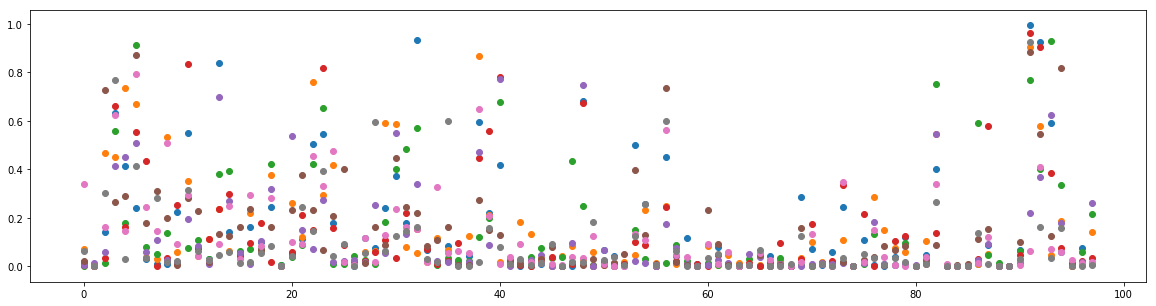

In [195]:
vs = np.array([probs_allClasses_allVariations[v]['VCA'] for v in variants])[:, ::100]

plt.figure(figsize=(20,5));
for v in variants:
    plt.scatter(range(vs.shape[1]), vs[v]);

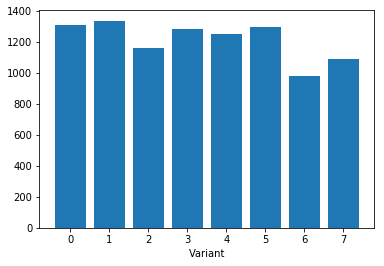

In [157]:
for structure in structures:
    plt.bar(variants, np.bincount(best_variation[structure], minlength=len(variants)))
    plt.xlabel('Variant');

In [151]:
title_viz_tuples = [("%d,%d" % (lo,hi), vizs[structures[0]])
 for (lo, hi), x in sorted(scoremap_viz_allSchemes_allFns_allStructs.items())
 for fn, vizs in x.iteritems()]

In [152]:
titles, vizs = zip(*title_viz_tuples)

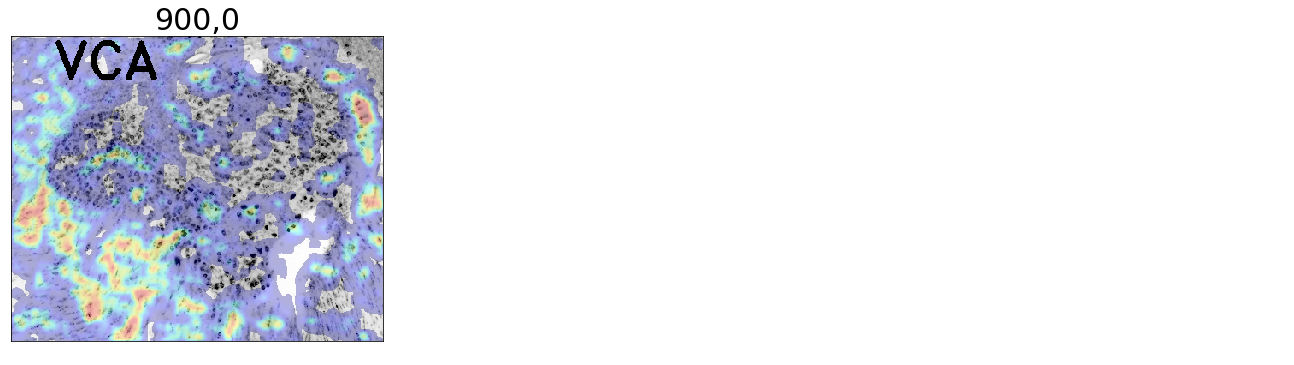

In [143]:
display_images_in_grids(vizs=vizs, titles=titles, nc=3)

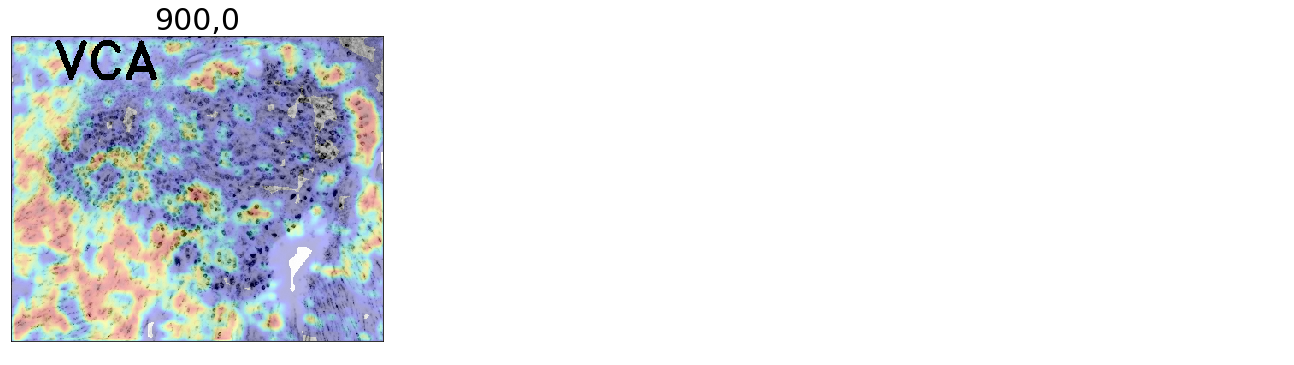

In [153]:
display_images_in_grids(vizs=vizs, titles=titles, nc=3)

In [91]:
viz = scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn][s].copy()
for x, y in sample_locations_roi - (roi_xmin, roi_ymin):
    cv2.circle(viz, (x,y), 5, color=(255,0,0))
display_image(viz)

/shared/MouseBrainAtlas/learning/tmp.jpg

In [17]:
# for t, v in zip(titles, vizs):
#     plt.figure(figsize=(20,20))
#     plt.imshow(v)
#     plt.title(t)
#     plt.show();